In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state = 42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LogisticReg',  'RandomForest', 'DecisionTree']

models = [LogisticRegression(random_state = 42),
          RandomForestClassifier(random_state = 42),
          DecisionTreeClassifier(random_state = 42)]

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        # plot roc
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for k in range(2):
            fpr[k], tpr[k], _ = roc_curve(Y_test,predictions)
            roc_auc[k] = auc(fpr[k], tpr[k])

        plt.figure()
        plt.plot(fpr[1], tpr[1])
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.show()
        plt.savefig('roc_plot' + str(model) +'.png')

        # roc plot done

        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [2]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [3]:
df = pd.read_csv("data.csv", index_col = 0)
df = df.dropna()
label_bc = df["sel"]
label_bc = np.where(label_bc == 'aufgenommen',1,0)
df = df.drop(columns = ["sel"])
#df = df.head(2000)
#df = df[['fz_score', 'ph_score']]


df = pd.get_dummies(df) #one hot encoding
#df.loc[df.sel == 'aufgenommen', 'sel']  = 1

#df.loc[df.sel == 'nicht aufgenommen', 'sel']  = 0
df

,alter,fz_score,zf_score,gm_score,md_score,bi_score,ch_score,ph_score,ma_score,tv_score,...,Schultyp_Realgymnasium,Schultyp_Realistisches Gymnasium,Schultyp_Realschule,Schultyp_Studienberechtigungsprüfung,Schultyp_Wirtschaftskundl.Realgymnasium,Schultyp_ausl. postsekund.Bildungseinr.,Schultyp_ausländische Reifeprüfung,Schultyp_inl. postsekund. Bildungseinr.,geschlecht_m,geschlecht_w
0,25.0,21.0,23.0,19.0,11.0,50.0,29.0,20.0,20.0,24.0,...,0,0,0,0,0,0,0,0,0,1
1,20.0,19.0,26.0,17.0,12.0,45.0,26.0,16.0,18.0,24.0,...,0,0,0,0,0,0,0,0,0,1
2,19.0,18.0,25.0,19.0,12.0,41.0,27.0,18.0,19.0,22.0,...,1,0,0,0,0,0,0,0,0,1
3,20.0,21.0,26.0,19.0,13.0,41.0,22.0,11.0,18.0,23.0,...,1,0,0,0,0,0,0,0,1,0
4,21.0,21.0,21.0,19.0,12.0,44.0,24.0,18.0,19.0,23.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,28.0,9.0,6.0,5.0,2.0,8.0,9.0,6.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4160,35.0,11.0,5.0,7.0,3.0,9.0,0.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0,1,0
4161,28.0,4.0,10.0,6.0,1.0,12.0,4.0,1.0,5.0,4.0,...,0,0,0,0,0,0,0,0,1,0
4163,19.0,4.0,4.0,6.0,3.0,12.0,7.0,3.0,5.0,6.0,...,0,0,0,0,0,0,0,0,1,0


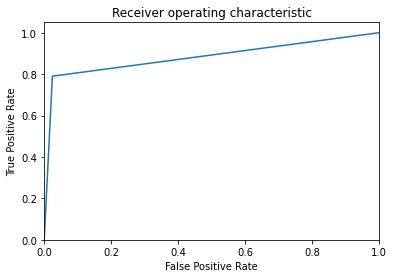

<Figure size 432x288 with 0 Axes>

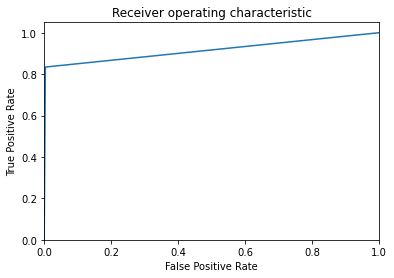

<Figure size 432x288 with 0 Axes>

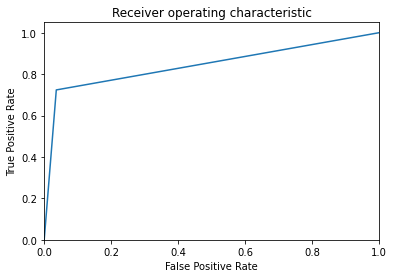

,Classifier,Accuracy
0,RandomForest,0.968239
1,LogisticReg,0.943215
2,DecisionTree,0.922040


<Figure size 432x288 with 0 Axes>

In [4]:
score1 = acc_score(df,label_bc)
score1

In [5]:
logmodel = RandomForestClassifier()
X_train,X_test, Y_train, Y_test = split(df,label_bc)
chromo_df_bc,score_bc=generations(df,label_bc,size=10,n_feat=df.shape[1],n_parents=4,mutation_rate=0.10,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.9576515880654476]
Best score in generation 2 : [0.9547641963426372]
Best score in generation 3 : [0.9538017324350336]
Best score in generation 4 : [0.9595765158806545]
Best score in generation 5 : [0.9653512993262753]


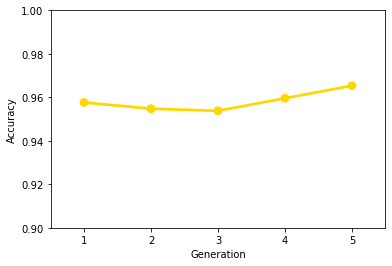

In [6]:
plot(score_bc,0.9,1.0,c = "gold")

### **Genetic Algorithm Selected Features**

In [7]:
import pandas as pd
df = pd.read_csv("data.csv")
df = df.dropna()
X = df.drop(['sel'], axis = 1) #independent variable
y = df['sel'] 
X = pd.get_dummies(X)

In [9]:
!pip install feature-selection-ga

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0127e5a2f6fd29662a1e915a71cd81d4acbd45bfd56330e72ff29957b46ff5ef
  Stored in directory: /Users/persephone/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [10]:
!pip install sklearn-genetic

In [18]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
import pandas as pd

from genetic_selection import GeneticSelectionCV

mcc = make_scorer(matthews_corrcoef)
estimator = LogisticRegression(solver = "liblinear", C = 6, tol = 1, fit_intercept = True)

from sklearn.model_selection import *
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 2, n_splits = 10)
for i in range(2,11):
  
  selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  
  selector = selector.fit(X, y)
  genfeats = X.columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats:  ", genfeats)
  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['geschlecht_w']
Chosen Feats:   ['alter', 'zf_score', 'bi_score']
Chosen Feats:   ['alter', 'zf_score', 'bi_score', 'ch_score']
Chosen Feats:   ['fz_score', 'ch_score', 'Schultyp_Realistisches Gymnasium']
Chosen Feats:   ['alter', 'gm_score', 'md_score', 'bi_score', 'ch_score', 'ma_score']
Chosen Feats:   ['alter', 'gm_score', 'md_score', 'bi_score', 'ma_score', 'Schultyp_ausländische Reifeprüfung']
Chosen Feats:   ['alter', 'zf_score', 'bi_score', 'ch_score', 'ph_score', 'ma_score', 'Schultyp_Realschule', 'geschlecht_w']
Chosen Feats:   ['alter', 'gm_score', 'md_score', 'bi_score', 'ch_score', 'Quote_Österreich', 'Schultyp_ausländische Reifeprüfung']
Chosen Feats:   ['alter', 'zf_score', 'bi_score', 'ch_score', 'ph_score', 'ma_score', 'Schultyp_Frauenoberschule', 'Schultyp_Realistisches Gymnasium', 'Schultyp_Studienberechtigungsprüfung']


In [19]:
report

,No of Feats,Chosen Feats,Scores
0,1,[geschlecht_w],0.000000
1,3,"[alter, zf_score, bi_score]",0.501728
2,4,"[alter, zf_score, bi_score, ch_score]",0.523631
3,3,"[fz_score, ch_score, Schultyp_Realistisches Gy...",0.001744
4,6,"[alter, gm_score, md_score, bi_score, ch_score...",0.556373
5,6,"[alter, gm_score, md_score, bi_score, ma_score...",0.546408
6,8,"[alter, zf_score, bi_score, ch_score, ph_score...",0.544085
7,7,"[alter, gm_score, md_score, bi_score, ch_score...",0.548825
8,9,"[alter, zf_score, bi_score, ch_score, ph_score...",0.548670


In [22]:
report.to_csv('report.csv',encoding='utf-8-sig')

In [21]:
chosen_feats

[['geschlecht_w'],
 ['alter', 'zf_score', 'bi_score'],
 ['alter', 'zf_score', 'bi_score', 'ch_score'],
 ['fz_score', 'ch_score', 'Schultyp_Realistisches Gymnasium'],
 ['alter', 'gm_score', 'md_score', 'bi_score', 'ch_score', 'ma_score'],
 ['alter',
  'gm_score',
  'md_score',
  'bi_score',
  'ma_score',
  'Schultyp_ausländische Reifeprüfung'],
 ['alter',
  'zf_score',
  'bi_score',
  'ch_score',
  'ph_score',
  'ma_score',
  'Schultyp_Realschule',
  'geschlecht_w'],
 ['alter',
  'gm_score',
  'md_score',
  'bi_score',
  'ch_score',
  'Quote_Österreich',
  'Schultyp_ausländische Reifeprüfung'],
 ['alter',
  'zf_score',
  'bi_score',
  'ch_score',
  'ph_score',
  'ma_score',
  'Schultyp_Frauenoberschule',
  'Schultyp_Realistisches Gymnasium',
  'Schultyp_Studienberechtigungsprüfung']]